In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Dec  4 18:19:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    29W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#replace it with own cds
%cd /content/drive/MyDrive/FinalProject/

/content/drive/.shortcut-targets-by-id/11lgq_1b00ajW9E0lxnskQL65w0wtxUg0/FinalProject


In [ ]:
!pip install torch==1.8.1 torchvision==0.9.1 torchaudio==0.8.1
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 804.1 MB 6.0 kB/s 
     |████████████████████████████████| 17.4 MB 351 kB/s 
     |████████████████████████████████| 1.9 MB 42.3 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.12.1+cu113
    Uninstalling torchaudio-0.12.1+cu113:
      Successfully uninstalled torchaudio-0.12.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.


In [ ]:
import torch
is_cuda = torch. cuda. is_available()
is_cuda

True

We defined the class of predictions we want, and load it into dataloader

Provided 2 type of dataloader:

1.song-level dataloader

2.instance-level dataloder

In [ ]:
import numpy as np 
# data_array = np.load('/content/drive/MyDrive/2-2/DeepLearning/FinalProject/tag_list.npy')
# mood_theme_tags = []
# for tag in data_array:
#   if 'mood/theme' in tag :
#     mood_theme_tags.append(tag)
# diction = dict()
# count = 0
# for i in mood_theme_tags:
#   diction[i] = count
#   count+=1
#15 leaast common mooods
diction = {'fast': 0,
     'sexy': 1,
     'travel': 2,
     'holiday': 3,
     'groovy': 4,
     'funny': 5,
     'retro': 6,
     'hopeful': 7,
     'powerful': 8,
     'cool': 9,
     'nature': 10,
     'game': 11,
     'heavy': 12}
    #  'mellow': 13,
    #  'horror': 14}


In [ ]:
import numpy as np 
data_array = np.load('/content/drive/MyDrive/FinalProject/tag_list.npy')
mood_theme_tags = []
least_common = {'fast': 0,
     'sexy': 1,
    #  'mellow': 2,
    #  'heavy': 3,
    #  'horror': 4,
     'travel': 2,
     'holiday': 3,
     'groovy': 4,
     'funny': 5,
     'retro': 6,
     'hopeful': 7,
     'powerful': 8,
     'cool': 9,
     'nature': 10,
     'game': 11}
for tag in data_array:
  if 'mood/theme' in tag :
    mood_theme_tags.append(tag)
diction = dict()
count = 0
for i in mood_theme_tags:
  if i.split("---")[1] in least_common.keys():
    continue
  diction[i] = count
  count+=1
print(len(diction.keys()))
print(len(diction))
# diction
# 15 leaast common mooods

44
44


In [ ]:
import os
import numpy as np
from torch.utils import data
from PIL import Image
from torchvision import transforms
import csv
import torch
basePath = '/content/drive/MyDrive/FinalProject/unzip/'
class AudioDS(data.Dataset):
  def __init__(self,tr_val='train'):
    if tr_val == 'test':
        self.file = '/content/drive/MyDrive/FinalProject/splits/autotagging_moodtheme-test.tsv'
    elif tr_val == "train":
      self.file = '/content/drive/MyDrive/FinalProject/splits/autotagging_moodtheme-train.tsv'
    elif tr_val == "valid":
      self.file = '/content/drive/MyDrive/FinalProject/splits/autotagging_moodtheme-validation.tsv'
    row = []
    with open(self.file) as fn:
      
      df = csv.reader(fn,delimiter='\t')
      for d in df:
        row.append(d)
    self.final_dic = {}
    count = 0
    for r in row[1:]:
      dic = {}
      dic['path'] = r[3].split('.')[0]
      dic['labels'] = torch.zeros(len(diction))
      tags = r[5:]
      for t in tags:
        #uncomment if using 15 least comon labels 
        t = t.split("---")[-1]
        if t in diction.keys():
          dic['labels'][diction[t]] = 1
      musicPath = basePath + dic['path']+".npy"
      dic['path'] = musicPath
      if torch.sum(dic['labels']) > 0 and os.path.exists(musicPath):
        try:
          np.load(musicPath)
          self.final_dic[count] = dic
          count += 1
        except:
          print(musicPath)
          continue
      self.transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomCrop((96, 1366)),
        transforms.ToTensor(),
     ])
  def __len__(self):
    return len(self.final_dic)
  def __getitem__(self,index):
    try:
      audio = np.array(np.load(self.final_dic[index]['path']))
    except:
      print(self.final_dic[index]['path'])
    audio = torch.Tensor(audio)[:,:1366].reshape((1,96,1366))
    # audio = self.transform(torch.Tensor(audio))
    labels = self.final_dic[index]['labels'].clone().detach()
    return audio,labels.type(torch.FloatTensor)
    #sourceTensor.clone().detach().requires_grad_(True)
train_data = AudioDS('train')
print(len(train_data))


555


In [ ]:
import os
import numpy as np
from torch.utils import data
from PIL import Image
from torchvision import transforms
import csv
import torch
basePath = '/content/drive/MyDrive/FinalProject/unzip/'
class AudioAgg(data.Dataset):
  def __init__(self,tr_val='train'):
    if tr_val == 'test':
        self.file = '/content/drive/MyDrive/FinalProject/splits/autotagging_moodtheme-test.tsv'
    elif tr_val == "train":
      self.file = '/content/drive/MyDrive/FinalProject/splits/autotagging_moodtheme-train.tsv'
    elif tr_val == "valid":
      self.file = '/content/drive/MyDrive/FinalProject/splits/autotagging_moodtheme-validation.tsv'
    row = []
    with open(self.file) as fn:
      df = csv.reader(fn,delimiter='\t')
      for d in df:
        row.append(d)
    self.final_dic = {}
    id = 0
    count = 0
    for r in row[1:]:
      dic = {}
      dic['path'] = r[3].split('.')[0]
      dic['labels'] = torch.zeros(len(diction))
      tags = r[5:]
      for t in tags:
        t = t.split("---")[-1]
        if t in diction.keys():
          dic['labels'][diction[t]] = 1
      musicPath = basePath + dic['path']+".npy"
      dic['path'] = musicPath
      # print(musicPath)
      if torch.sum(dic['labels']) > 0 and os.path.exists(musicPath):
        try:
          specs = np.array(np.load(musicPath))
          leng = specs.shape[1]
          for i in range(leng//1633):
            dic['chunk'] = i
            dic['id'] = id
            self.final_dic[count] = dic.copy()
            count += 1
            id += 1
        except:
          print(musicPath)
    # print(self.final_dic[0]['id'])
    # print(count)
  def __len__(self):
    return len(self.final_dic)
  def __getitem__(self,index):
    audio = np.array(np.load(self.final_dic[index]['path']))
    idx = self.final_dic[index]['chunk']
    audio = torch.Tensor(audio)[:,idx*1633:idx*1633+1366].reshape((1,96,1366))
    id = self.final_dic[index]['id']
    labels = self.final_dic[index]['labels'].clone().detach()
    return id,audio,labels.type(torch.FloatTensor)
    #sourceTensor.clone().detach().requires_grad_(True)
val_data = AudioAgg()
print(len(val_data))
val_data[0]

/content/drive/MyDrive/FinalProject/unzip/51/719851.npy
/content/drive/MyDrive/FinalProject/unzip/51/816751.npy
/content/drive/MyDrive/FinalProject/unzip/51/1045251.npy
/content/drive/MyDrive/FinalProject/unzip/51/1189951.npy
/content/drive/MyDrive/FinalProject/unzip/51/1248251.npy
/content/drive/MyDrive/FinalProject/unzip/51/1368951.npy
2619


(0,
 tensor([[[-90.0000, -90.0000, -90.0000,  ...,   2.4192,  -1.3330,   1.1599],
          [-90.0000, -90.0000, -90.0000,  ...,   4.8742,   7.0956,   5.9450],
          [-90.0000, -90.0000, -90.0000,  ...,   1.2462,   8.5799,   3.8312],
          ...,
          [-90.0000, -90.0000, -90.0000,  ..., -14.8300, -14.3349, -14.7500],
          [-90.0000, -90.0000, -90.0000,  ..., -23.5093, -25.1899, -23.5006],
          [-90.0000, -90.0000, -90.0000,  ..., -37.5183, -38.7109, -37.7366]]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

MODEL:


In [ ]:
from torch.utils import data
train_data = AudioAgg('train')
val_data = AudioAgg('valid')
# val_data = AudioDS('valid')
test_data = AudioAgg('test')
batch_size = 10
num_workers = 1
train_loader = data.DataLoader(dataset=train_data,
                                  batch_size=batch_size,
                                  shuffle=True,
                                  drop_last=False,
                                  num_workers=num_workers)

val_loader = data.DataLoader(dataset=val_data,
                                  batch_size=1,
                                  num_workers=num_workers)
test_loader = data.DataLoader(dataset=test_data,
                                  batch_size=batch_size,
                                  shuffle=True,
                                  drop_last=False,
                                  num_workers=num_workers)

/content/drive/MyDrive/FinalProject/unzip/51/719851.npy
/content/drive/MyDrive/FinalProject/unzip/51/816751.npy
/content/drive/MyDrive/FinalProject/unzip/51/1045251.npy
/content/drive/MyDrive/FinalProject/unzip/51/1189951.npy
/content/drive/MyDrive/FinalProject/unzip/51/1248251.npy
/content/drive/MyDrive/FinalProject/unzip/51/1368951.npy
/content/drive/MyDrive/FinalProject/unzip/51/11751.npy
/content/drive/MyDrive/FinalProject/unzip/51/21851.npy
/content/drive/MyDrive/FinalProject/unzip/51/25251.npy
/content/drive/MyDrive/FinalProject/unzip/51/158351.npy
/content/drive/MyDrive/FinalProject/unzip/51/1121451.npy
/content/drive/MyDrive/FinalProject/unzip/51/1294751.npy
/content/drive/MyDrive/FinalProject/unzip/51/1347951.npy
/content/drive/MyDrive/FinalProject/unzip/51/1354151.npy
/content/drive/MyDrive/FinalProject/unzip/51/1387751.npy
/content/drive/MyDrive/FinalProject/unzip/51/361551.npy
/content/drive/MyDrive/FinalProject/unzip/51/646651.npy
/content/drive/MyDrive/FinalProject/unzip/

In [ ]:
# test_loader = data.DataLoader(dataset=test_data,
#                                   batch_size=batch_size,
#                                   shuffle=True,
#                                   num_workers=num_workers)
print(len(train_data))
print(len(val_data))
print(len(test_data))
# for x,y in val_loader:
#   # print(x.flags['WRITEABLE'])
#   print(x)
#   print(y)
#   break

2619
1185
1164


We define the model architecture using 4 layer deep 
observation: even though instance-level increase data-sample size a lot,
the increase in accuracy is still limited

In [ ]:
import os 
import tarfile
unzip_path = "/content/drive/MyDrive/FinalProject/unzip"
for dir in os.listdir(unzip_path):
  if dir.endswith("tar"):
    file = tarfile.open(os.path.join(unzip_path,dir))
    file.extractall(unzip_path)
    file.close()

In [ ]:
import torch.nn as nn
from torch.autograd import Variable
class CNN(nn.Module):
  def __init__(self,num_class = len(diction)):
    super().__init__()

    self.bn_init = nn.BatchNorm2d(1)

    self.conv_1 = nn.Conv2d(1,64,3,padding=1)
    self.bn_1 = nn.BatchNorm2d(64)
    self.mp_1 = nn.MaxPool2d((2,4))

    self.conv_2 = nn.Conv2d(64,128,3,padding=1)
    self.bn_2 = nn.BatchNorm2d(128)
    self.mp_2 = nn.MaxPool2d((4, 5))
    

    self.conv_3 = nn.Conv2d(128, 128, 3, padding=1)
    self.bn_3 = nn.BatchNorm2d(128)
    self.mp_3 = nn.MaxPool2d((3, 8))

    self.conv_4 = nn.Conv2d(128, 128, 3, padding=1)
    self.bn_4 = nn.BatchNorm2d(128)
    self.mp_4 = nn.MaxPool2d((4, 8))
    self.relu = nn.ReLU()

    # self.conv_5 = nn.Conv2d(128, 64, 3, padding=1)
    # self.bn_5 = nn.BatchNorm2d(64)
    # self.mp_5 = nn.MaxPool2d((4, 4))

    self.dense = nn.Linear(128, num_class)
    self.dropout = nn.Dropout(0.5)
  def forward(self,x):
      x = self.bn_init(x)

        # layer 1
      x = self.mp_1(self.relu(self.bn_1(self.conv_1(x))))

        # layer 2
      x = self.mp_2(self.relu((self.bn_2(self.conv_2(x)))))

      #   # layer 3
      x = self.mp_3(self.relu((self.bn_3(self.conv_3(x)))))

      #   # layer 4
      x = self.mp_4(self.relu((self.bn_4(self.conv_4(x)))))

        # layer 5
      # x = self.mp_5(nn.RELU()(self.bn_5(self.conv_5(x))))

        # classifier
      # print(x.shape)
      x = x.view(x.size(0), -1)
      # print(x.shape)
      x = self.dropout(x)
      logit = nn.Sigmoid()(self.dense(x))

      return logit


In [ ]:
from sklearn import metrics
def get_auc(prd_array,gt_array):
  roc_aucs = metrics.roc_auc_score(gt_array, prd_array, average='macro')
  pr_aucs = metrics.average_precision_score(gt_array, prd_array, average='macro')
  roc_auc_all = metrics.roc_auc_score(gt_array, prd_array, average=None)
  pr_auc_all = metrics.average_precision_score(gt_array, prd_array, average=None)
  return roc_aucs, pr_aucs, roc_auc_all, pr_auc_all



In [ ]:
import tqdm
import scikitplot as skplt
import matplotlib.pyplot as plt
def validation(model,val_loader,graph=False,all_class=False):
  model.eval()
  loss_fn = nn.BCELoss()
  prd_array = torch.tensor([])
  gt_array = torch.tensor([])
  song = {}
  for id,x,y in val_loader:
    if is_cuda:
      x = x.cuda()
      y = y.cuda()
    out = model(x)
    loss = loss_fn(out,y)
    out = out.detach().cpu()
    y = y.detach().cpu()
    id = int(id[0])
    if id not in song.keys():
      song[id] = {}
      song[id]['out'] = torch.tensor([])
      song[id]['y'] = y.detach().cpu()
      song[id]['out'] = torch.cat((song[id]['out'],out))
    else:
      song[id]['out'] = torch.cat((song[id]['out'],out))

  for id,dic in song.items():
    mean = torch.mean(dic['out'],dim=0,keepdims =True)
    prd_array = torch.cat((prd_array,mean))
    y = dic['y']
    gt_array = torch.cat((gt_array,y))
  roc_aucs, pr_aucs, roc_auc_all, pr_auc_all = get_auc(prd_array,gt_array)

  #   prd_array = torch.cat((prd_array,out))
  #   gt_array = torch.cat((gt_array,y))
  # if all_class == True:
  #   for i in range(15):
  #     array = np.where(gt_array[:,i:i+1]==1)
  #     print(i)
  #     print(array)
  # roc_aucs, pr_aucs, roc_auc_all, pr_auc_all = get_auc(prd_array,gt_array)
  if graph==True:
    for i in range(gt_array.shape[1]):
      fpr, tpr, thresh = metrics.roc_curve(gt_array[:,i:i+1], prd_array[:,i:i+1])
      plt.plot(fpr,tpr,label="data 1")
    plt.show()

  return roc_aucs, pr_aucs, roc_auc_all, pr_auc_all



def train(models,optimizer,batch_iterator):
    models.train()
    loss_fn = nn.BCELoss()
    totalLoss = 0
    for _,x,y in batch_iterator:
        if is_cuda:
          x = x.cuda()
          y = y.cuda()
        optimizer.zero_grad()
        out = models.forward(x)
        loss = loss_fn(out,y)
        loss.backward()
        optimizer.step()
        totalLoss += loss
    return totalLoss
# models = CNN(num_class = 56).cuda()
# validation(models)
# validation(models,val_loader,graph=True)

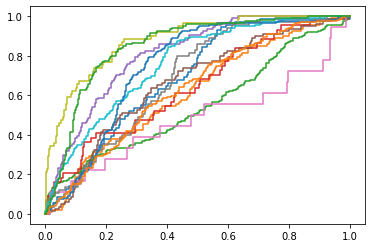

(0.6914512191923008,
 0.1872515882881175,
 array([0.69031785, 0.61303154, 0.54662631, 0.64339495, 0.80778701,
        0.66075792, 0.47772065, 0.68644231, 0.88014118, 0.75834215,
        0.74437424, 0.63069656, 0.84923318]),
 array([0.09836198, 0.10787362, 0.23317858, 0.10489726, 0.24744687,
        0.10297707, 0.0234158 , 0.10339228, 0.39091167, 0.27437995,
        0.23785126, 0.19685042, 0.31273388]))

In [ ]:
validation(models,val_loader,graph=True)

training:   0%|          | 0/30 [00:00<?, ?epoch/s]

epoch 1:   0%|          | 0/262 [00:00<?, ?batch/s]

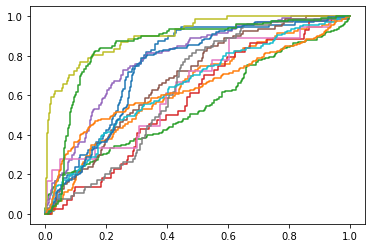

epoch: 0
loss: 79.59980773925781
val: (0.6967517401640995, 0.2014052162673799, array([0.75852783, 0.63925574, 0.55135748, 0.57636842, 0.78417977,
       0.6840724 , 0.64257831, 0.63451923, 0.90616067, 0.65039153,
       0.73665225, 0.64205797, 0.85165102]), array([0.12367884, 0.11606145, 0.2431744 , 0.04362216, 0.24730741,
       0.11639051, 0.07607195, 0.09698332, 0.51706883, 0.19591948,
       0.25203922, 0.27719841, 0.31275181]))


epoch 2:   0%|          | 0/262 [00:00<?, ?batch/s]

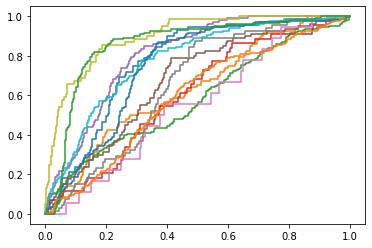

epoch: 1
loss: 69.91240692138672
val: (0.7028810395269989, 0.18490763139353117, array([0.77252383, 0.63189665, 0.58126698, 0.60266114, 0.80356493,
       0.67348416, 0.55436542, 0.6521978 , 0.89624293, 0.77693827,
       0.74292301, 0.5919236 , 0.85746479]), array([0.13777605, 0.1146098 , 0.22451859, 0.0541631 , 0.24547746,
       0.11188955, 0.01757213, 0.07521901, 0.39645381, 0.28232656,
       0.25150192, 0.17496623, 0.31732502]))


epoch 3:   0%|          | 0/262 [00:00<?, ?batch/s]

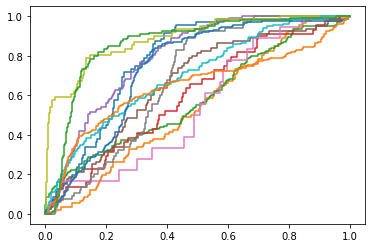

epoch: 2
loss: 67.3128433227539
val: (0.6922299492013223, 0.19329551850660995, array([0.7783397 , 0.53637774, 0.58052091, 0.59684487, 0.79403707,
       0.66418552, 0.54532038, 0.67723901, 0.88852751, 0.69820811,
       0.73486061, 0.64421491, 0.86031299]), array([0.13803749, 0.07965727, 0.2620755 , 0.05079655, 0.22176413,
       0.11290801, 0.02229065, 0.07874805, 0.48447524, 0.23739985,
       0.24764455, 0.25775965, 0.31928477]))


epoch 4:   0%|          | 0/262 [00:00<?, ?batch/s]

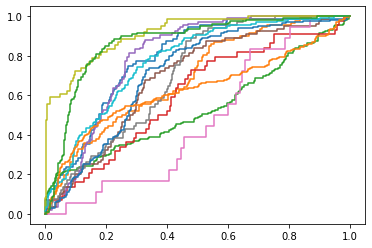

epoch: 3
loss: 65.91262817382812
val: (0.703936898350743, 0.21924446926927005, array([0.78775887, 0.68866104, 0.53017639, 0.60276074, 0.79388969,
       0.68791855, 0.46953251, 0.69986264, 0.91149875, 0.7735097 ,
       0.70875636, 0.62859153, 0.86826291]), array([0.22619574, 0.14933502, 0.26355055, 0.05897487, 0.19046779,
       0.11604308, 0.01423141, 0.09713126, 0.59189784, 0.29303165,
       0.22795976, 0.27025263, 0.35110651]))


epoch 5:   0%|          | 0/262 [00:00<?, ?batch/s]

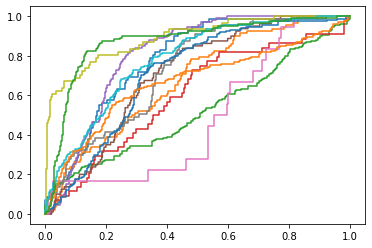

epoch: 4
loss: 64.53350067138672
val: (0.7096354160790088, 0.2174278326349521, array([0.7824993 , 0.6753053 , 0.51947666, 0.60128675, 0.80623515,
       0.70794683, 0.48376654, 0.72902473, 0.89030687, 0.77845503,
       0.710763  , 0.66763556, 0.87255869]), array([0.20796262, 0.13122681, 0.23509376, 0.05109438, 0.20166763,
       0.11455325, 0.02526679, 0.12771339, 0.53589178, 0.31453149,
       0.22298225, 0.27186972, 0.38670796]))


epoch 6:   0%|          | 0/262 [00:00<?, ?batch/s]

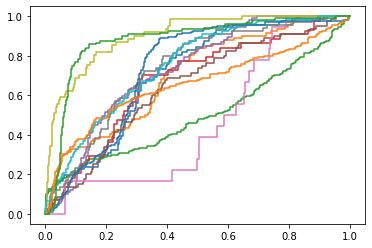

epoch: 5
loss: 63.02983093261719
val: (0.6987592989065564, 0.20314389163154653, array([0.71038258, 0.70035602, 0.49975131, 0.67600191, 0.72970888,
       0.64442308, 0.46838998, 0.73348901, 0.8998454 , 0.75196473,
       0.73388715, 0.65632029, 0.87935055]), array([0.18587245, 0.18389506, 0.23090965, 0.06985843, 0.17240815,
       0.10312922, 0.0161946 , 0.11850986, 0.37312032, 0.29051132,
       0.2302818 , 0.29117266, 0.37500707]))


epoch 7:   0%|          | 0/262 [00:00<?, ?batch/s]

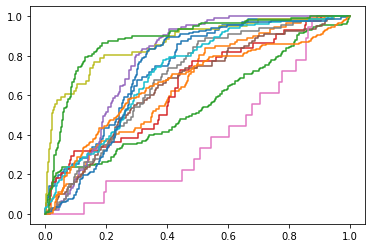

epoch: 6
loss: 62.09136199951172
val: (0.691388788943448, 0.19592206850918462, array([0.74708575, 0.65689765, 0.55309831, 0.64783683, 0.77925546,
       0.65763575, 0.39003142, 0.69123626, 0.86567295, 0.72217989,
       0.73133107, 0.66429058, 0.88150235]), array([0.16624433, 0.12603891, 0.24315827, 0.10884853, 0.17443667,
       0.1054563 , 0.01222365, 0.08963528, 0.40588451, 0.24722358,
       0.22093026, 0.23820969, 0.40869691]))


epoch 8:   0%|          | 0/262 [00:00<?, ?batch/s]

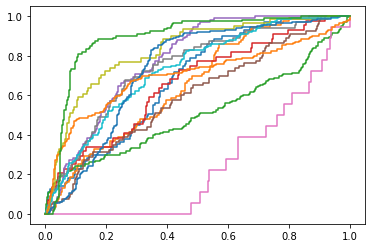

epoch: 7
loss: 61.00471496582031
val: (0.6730061433145368, 0.18250435171748408, array([0.67988722, 0.65304905, 0.50604134, 0.66170026, 0.77868327,
       0.59835973, 0.25292773, 0.7407967 , 0.82620617, 0.72857848,
       0.73337952, 0.70026068, 0.8892097 ]), array([0.13527512, 0.12066895, 0.23083797, 0.08355199, 0.19473326,
       0.09424898, 0.00991958, 0.12836616, 0.19356212, 0.2334036 ,
       0.22959429, 0.34712769, 0.37126687]))


epoch 9:   0%|          | 0/262 [00:00<?, ?batch/s]

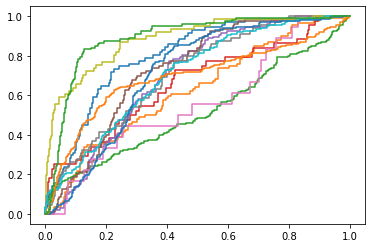

epoch: 8
loss: 60.460445404052734
val: (0.7055936619592806, 0.2056466365651232, array([0.80298126, 0.62299614, 0.514885  , 0.65984782, 0.69714598,
       0.72711538, 0.56060173, 0.70881868, 0.88381658, 0.70538272,
       0.70894747, 0.69044488, 0.88973396]), array([0.1962979 , 0.11466416, 0.22243051, 0.14394191, 0.13998202,
       0.11996795, 0.0204538 , 0.11180588, 0.43640387, 0.26179247,
       0.20922786, 0.30138877, 0.39504917]))


epoch 10:   0%|          | 0/262 [00:00<?, ?batch/s]

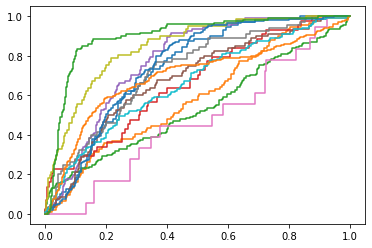

epoch: 9
loss: 59.02947998046875
val: (0.694574451013383, 0.1888298083063878, array([0.7348345 , 0.58814989, 0.5375461 , 0.66323401, 0.77577029,
       0.68386878, 0.4702942 , 0.72618132, 0.84577913, 0.66125573,
       0.74868613, 0.69558924, 0.89827856]), array([0.11204387, 0.11063583, 0.23111848, 0.14549214, 0.19445767,
       0.11976746, 0.01457506, 0.1209723 , 0.24609663, 0.20585881,
       0.24230403, 0.28539412, 0.42607111]))


epoch 11:   0%|          | 0/262 [00:00<?, ?batch/s]

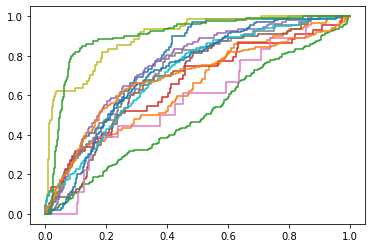

epoch: 10
loss: 58.051780700683594
val: (0.7108165981973553, 0.19963907410254272, array([0.77428123, 0.64320379, 0.50189247, 0.65986774, 0.75344615,
       0.68761312, 0.58597544, 0.72467033, 0.89533866, 0.7084515 ,
       0.71757125, 0.68714604, 0.90115806]), array([0.1416031 , 0.13357901, 0.13893699, 0.13577869, 0.18562757,
       0.11632802, 0.02105804, 0.11471146, 0.41118695, 0.25793627,
       0.22402533, 0.28257834, 0.4319582 ]))


epoch 12:   0%|          | 0/262 [00:00<?, ?batch/s]

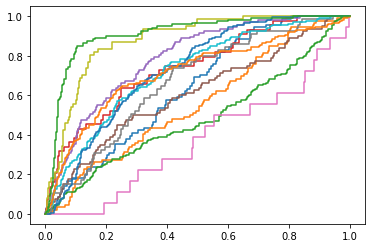

epoch: 11
loss: 56.8331298828125
val: (0.6769359971840989, 0.18494868523053518, array([0.63615445, 0.55540197, 0.48396254, 0.73836746, 0.78558424,
       0.60808824, 0.37370275, 0.66681319, 0.8782889 , 0.72205996,
       0.72679821, 0.71493823, 0.91000782]), array([0.08686614, 0.09321564, 0.14434676, 0.13286064, 0.24381527,
       0.11608659, 0.01187957, 0.09131364, 0.24437538, 0.22943793,
       0.23399263, 0.30639824, 0.46974447]))


epoch 13:   0%|          | 0/262 [00:00<?, ?batch/s]

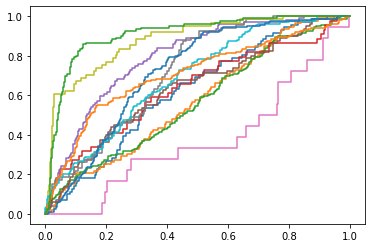

epoch: 12
loss: 55.659019470214844
val: (0.6782522832899981, 0.1968644418842006, array([0.62072976, 0.5727157 , 0.56507182, 0.63572624, 0.7935169 ,
       0.63530543, 0.3741312 , 0.71958791, 0.87941194, 0.68926279,
       0.71754139, 0.70516281, 0.90911581]), array([0.09278505, 0.09791944, 0.18129313, 0.08674073, 0.25234581,
       0.11174724, 0.0121688 , 0.11777662, 0.33659348, 0.25122831,
       0.22168289, 0.3090188 , 0.48793745]))


epoch 14:   0%|          | 0/262 [00:00<?, ?batch/s]

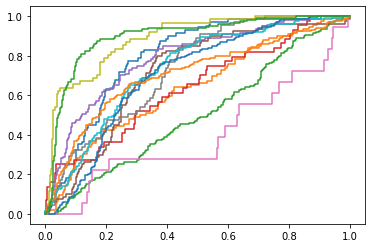

epoch: 13
loss: 54.03126907348633
val: (0.7024815603001205, 0.1978119010192399, array([0.79519306, 0.63502924, 0.50021836, 0.64150267, 0.78671129,
       0.71265837, 0.3995049 , 0.73288462, 0.8881483 , 0.73346737,
       0.7029156 , 0.70637392, 0.89765258]), array([0.15999321, 0.12530101, 0.13313319, 0.13231872, 0.26693707,
       0.11901137, 0.01365118, 0.12094965, 0.3171386 , 0.23294196,
       0.21089264, 0.29900267, 0.44028344]))


epoch 15:   0%|          | 0/262 [00:00<?, ?batch/s]

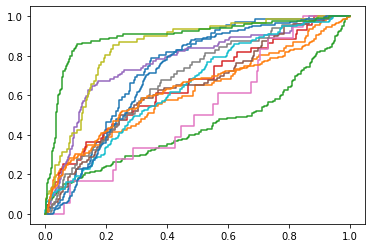

epoch: 14
loss: 52.19503402709961
val: (0.6769295119608066, 0.1889119953449318, array([0.73944926, 0.61758622, 0.44311069, 0.65377261, 0.77087199,
       0.64177602, 0.52151766, 0.68134615, 0.84315384, 0.64740741,
       0.71201715, 0.62995259, 0.89812207]), array([0.11202546, 0.15652739, 0.16912463, 0.08834243, 0.24099734,
       0.11220112, 0.01728417, 0.09849586, 0.22321222, 0.22016522,
       0.2141206 , 0.26340717, 0.53995233]))


epoch 16:   0%|          | 0/262 [00:00<?, ?batch/s]

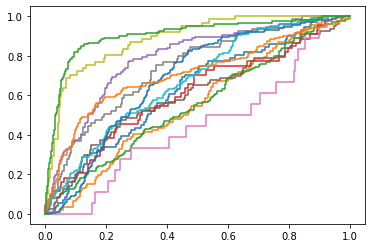

epoch: 15
loss: 51.03908920288086
val: (0.6745430417021143, 0.20214589958287715, array([0.62626748, 0.55184176, 0.5531893 , 0.61196319, 0.78689335,
       0.60270362, 0.44639627, 0.73846154, 0.88598973, 0.67150617,
       0.68321946, 0.70631625, 0.90431142]), array([0.08573309, 0.08586284, 0.19632344, 0.10834621, 0.25124756,
       0.10347342, 0.01400126, 0.13512983, 0.33762407, 0.20830919,
       0.2002615 , 0.33185232, 0.56973196]))


epoch 17:   0%|          | 0/262 [00:00<?, ?batch/s]

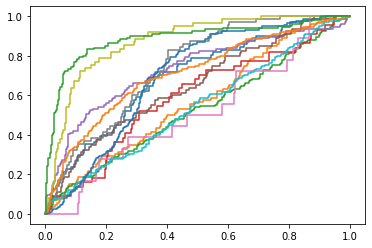

epoch: 16
loss: 49.472389221191406
val: (0.6701313586048576, 0.18790359022446973, array([0.69488204, 0.56637098, 0.52332225, 0.59078958, 0.73067987,
       0.64660633, 0.5157098 , 0.7418956 , 0.87401552, 0.53789771,
       0.69433363, 0.70791954, 0.88728482]), array([0.13079021, 0.10299817, 0.15843515, 0.05346416, 0.27500819,
       0.12597754, 0.01694567, 0.12311991, 0.24077078, 0.14062226,
       0.20387131, 0.29719809, 0.57354522]))


epoch 18:   0%|          | 0/262 [00:00<?, ?batch/s]

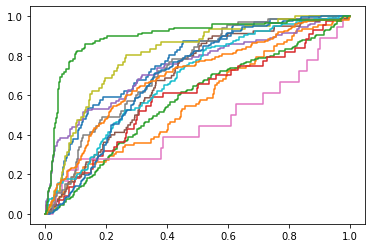

epoch: 17
loss: 48.2133903503418
val: (0.6845422446674636, 0.18223169076504953, array([0.76653096, 0.56416325, 0.57565023, 0.59317983, 0.74182893,
       0.6842138 , 0.45986861, 0.73208791, 0.80498512, 0.68421164,
       0.69678221, 0.69656389, 0.89898279]), array([0.15051485, 0.09949607, 0.1604788 , 0.06608484, 0.30929444,
       0.10906657, 0.02167814, 0.11324645, 0.15362826, 0.20616254,
       0.20604876, 0.26620427, 0.50710799]))


epoch 19:   0%|          | 0/262 [00:00<?, ?batch/s]

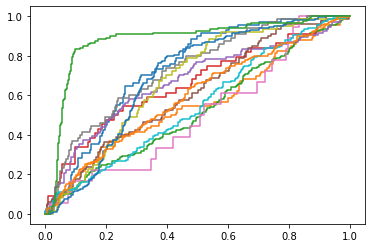

epoch: 18
loss: 46.879737854003906
val: (0.6444314021641178, 0.14881444584184372, array([0.73638961, 0.5528064 , 0.52144192, 0.66020636, 0.66935134,
       0.61257919, 0.50299914, 0.73021978, 0.67567528, 0.54729453,
       0.69181935, 0.59540122, 0.8814241 ]), array([0.12959508, 0.10163552, 0.15353399, 0.09304472, 0.17694016,
       0.11173787, 0.0183917 , 0.12705643, 0.07874451, 0.14870032,
       0.20018887, 0.19530589, 0.39971274]))


epoch 20:   0%|          | 0/262 [00:00<?, ?batch/s]

KeyboardInterrupt: ignored

In [ ]:
import torch
n_epochs = 30
lr = 1e-1
is_cuda = torch.cuda.is_available()
models = CNN(num_class = len(diction))
# print(models)
if is_cuda:
  models = models.cuda()
optimizer = torch.optim.SGD(models.parameters(),lr=lr,momentum=0.9)
best_accuracy = 0
for epoch in tqdm.notebook.trange(n_epochs, desc="training", unit="epoch"):
  with tqdm.notebook.tqdm(
                train_loader,
                desc="epoch {}".format(epoch + 1),
                unit="batch",
                total=len(train_loader)) as batch_iterator:
    loss = train(models,optimizer,batch_iterator)
  roc_aucs, pr_aucs, roc_auc_all, pr_auc_all = validation(models,val_loader)
  # if roc_aucs > best_accuracy:
  #   print("saving models...")
  #   torch.save(models.state_dict(),'/content/drive/MyDrive/FinalProject/best-pretrained.pt')
  print(f'epoch: {epoch}')
  print(f'loss: {loss}')
  print(f'val: {roc_aucs, pr_aucs, roc_auc_all, pr_auc_all}')
  # models.train()
  # epoch = 0
  # totalLoss = 0
  # for x,y in train_loader:
  #   if is_cuda:
  #     x = x.cuda()
  #     y = y.cuda()
  #   out = models.forward(x)
  #   loss_fn = nn.BCELoss()
  #   loss = loss_fn(out,y)
  #   loss.backward()
  #   optimizer.step()
  #   totalLoss += loss
  # print(f"loss on epoch {epoch} = {totalLoss}")






The following code is an effort to try training using the rest of the labels thay are not least common 13. However, surprising, loading the pretraining does not give a better accuracy

In [ ]:
leastDiction = {'fast': 0,
     'sexy': 1,
    #  'mellow': 2,
    #  'heavy': 3,
    #  'horror': 4,
     'travel': 2,
     'holiday': 3,
     'groovy': 4,
     'funny': 5,
     'retro': 6,
     'hopeful': 7,
     'powerful': 8,
     'cool': 9,
     'nature': 10,
     'game': 11}

In [ ]:
import os
import numpy as np
from torch.utils import data
from PIL import Image
from torchvision import transforms
import csv
import torch
basePath = '/content/drive/MyDrive/FinalProject/unzip/'
class Audioleast15(data.Dataset):
  def __init__(self,tr_val='train'):
    if tr_val == 'test':
        self.file = '/content/drive/MyDrive/FinalProject/splits/autotagging_moodtheme-test.tsv'
    elif tr_val == "train":
      self.file = '/content/drive/MyDrive/FinalProject/splits/autotagging_moodtheme-train.tsv'
    elif tr_val == "valid":
      self.file = '/content/drive/MyDrive/FinalProject/splits/autotagging_moodtheme-validation.tsv'
    row = []
    with open(self.file) as fn:
      
      df = csv.reader(fn,delimiter='\t')
      for d in df:
        row.append(d)
    self.final_dic = {}
    count = 0
    for r in row[1:]:
      dic = {}
      dic['path'] = r[3].split('.')[0]
      dic['labels'] = torch.zeros(len(leastDiction))
      tags = r[5:]
      for t in tags:
        #uncomment if using 15 least comon labels 
        t = t.split("---")[-1]
        if t in leastDiction.keys():
          dic['labels'][leastDiction[t]] = 1
      musicPath = basePath + dic['path']+".npy"
      dic['path'] = musicPath
      if torch.sum(dic['labels']) > 0 and os.path.exists(musicPath):
        self.final_dic[count] = dic
        count += 1
  def __len__(self):
    return len(self.final_dic)
  def __getitem__(self,index):
    audio = np.array(np.load(self.final_dic[index]['path']))
    audio = torch.Tensor(audio)[:,:1366].reshape((1,96,1366))
    labels = self.final_dic[index]['labels'].clone().detach()
    return audio,labels.type(torch.FloatTensor)

In [ ]:
from torch.utils import data
train_data_LC = Audioleast15('train')
# val_data = AudioAgg()
val_data_LC = Audioleast15('valid')
test_data_LC = Audioleast15('test')
batch_size = 10
num_workers = 1
train_loader_LC = data.DataLoader(dataset=train_data_LC,
                                  batch_size=batch_size,
                                  shuffle=True,
                                  drop_last=False,
                                  num_workers=num_workers)

val_loader_LC = data.DataLoader(dataset=val_data_LC,
                                  batch_size=10,
                                  num_workers=num_workers)
test_loader_LC = data.DataLoader(dataset=test_data_LC,
                                  batch_size=batch_size,
                                  shuffle=True,
                                  drop_last=False,
                                  num_workers=num_workers)

In [ ]:
print(len(val_data_LC))
print(len(test_data_LC))
print(len(train_data_LC))

220
222
478


In [ ]:
import torch.nn as nn
from torch.autograd import Variable
PATH = "/content/drive/MyDrive/FinalProject/best-pretrained.pt"
class CNNLeast(nn.Module):
  def __init__(self,num_class = len(leastDiction)):
    super().__init__()
    self.pretrained_model = CNN(num_class = 44)
    self.pretrained_model.load_state_dict(torch.load(PATH))
    # for param_tensor in self.pretrained_model.state_dict():
    #   print(param_tensor)
    print(num_class)
    self.pretrained_model.dense = nn.Linear(128, num_class)

    
  def forward(self,x):
      logit = self.pretrained_model.forward(x)

      return logit
CNNLeast()

12


CNNLeast(
  (pretrained_model): CNN(
    (bn_init): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv_1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (mp_1): MaxPool2d(kernel_size=(2, 4), stride=(2, 4), padding=0, dilation=1, ceil_mode=False)
    (conv_2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn_2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (mp_2): MaxPool2d(kernel_size=(4, 5), stride=(4, 5), padding=0, dilation=1, ceil_mode=False)
    (conv_3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn_3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (mp_3): MaxPool2d(kernel_size=(3, 8), stride=(3, 8), padding=0, dilation=1, ceil_mode=False)
    (conv_4): Conv2d(128, 128, kernel_size=(3, 3), stride=

In [ ]:
def init_weights(m: nn.Module, hidden_size=128):
    ### YOUR CODE STARTS HERE ###
    k = 1/hidden_size
    for name, param in m.named_parameters():
        if name.startswith("dense"):
          if 'weight' in name:
              nn.init.uniform_(param.data, a=-1*k**0.5, b=k**0.5)
          else:
              nn.init.uniform_(param.data, 0)
if is_cuda:
  LCModel = CNNLeast(len(leastDiction)).cuda()
LCModel.apply(init_weights)
if is_cuda:
  LCModel.cuda()
print("initializing model")

12
initializing model


In [ ]:
import torch
n_epochs = 10
lr = 1e-1
optimizer = torch.optim.SGD(models.parameters(),lr=lr,momentum=0.9)
# best_accuracy = 0
for epoch in tqdm.notebook.trange(n_epochs, desc="training", unit="epoch"):
  with tqdm.notebook.tqdm(
                train_loader,
                desc="epoch {}".format(epoch + 1),
                unit="batch",
                total=len(train_loader_LC)) as batch_iterator:
    loss = train(LCModel,optimizer,batch_iterator)
  roc_aucs, pr_aucs, roc_auc_all, pr_auc_all = validation(LCModel,val_loader_LC)
  # if roc_aucs > best_accuracy:
  #   print("saving models...")
  #   torch.save(models.state_dict(),'/content/drive/MyDrive/FinalProject/best-pretrained.pt')
  print(f'epoch: {epoch}')
  print(f'loss: {loss}')
  print(f'val: {roc_aucs, pr_aucs, roc_auc_all, pr_auc_all}')

training:   0%|          | 0/10 [00:00<?, ?epoch/s]

epoch 1:   0%|          | 0/48 [00:00<?, ?batch/s]

epoch: 0
loss: 51.19174575805664
val: (0.5256036363458978, 0.11244495639158604, array([0.67302358, 0.36298077, 0.47982456, 0.57383578, 0.5345641 ,
       0.43205027, 0.65264798, 0.62299679, 0.51979121, 0.54528061,
       0.31778929, 0.59245868]), array([0.10570563, 0.04704167, 0.12469013, 0.08914638, 0.13717342,
       0.07428342, 0.04842173, 0.08479937, 0.05275335, 0.11564201,
       0.12306141, 0.34662096]))


epoch 2:   0%|          | 0/48 [00:00<?, ?batch/s]

epoch: 1
loss: 51.03907775878906
val: (0.5314442662636286, 0.11218817201121355, array([0.70769764, 0.35296474, 0.47070175, 0.57935049, 0.51117949,
       0.45902069, 0.67601246, 0.625     , 0.54719443, 0.53252551,
       0.32335444, 0.59232955]), array([0.11764875, 0.04525825, 0.12292601, 0.08758564, 0.12602875,
       0.08072703, 0.0540055 , 0.08375547, 0.05631394, 0.11341908,
       0.1237965 , 0.33479314]))


epoch 3:   0%|          | 0/48 [00:00<?, ?batch/s]

epoch: 2
loss: 50.987548828125
val: (0.5233469415426679, 0.11217842906645013, array([0.66504854, 0.37299679, 0.47842105, 0.57169118, 0.52902564,
       0.43493061, 0.63785047, 0.62179487, 0.50848195, 0.55038265,
       0.31759739, 0.59194215]), array([0.10320096, 0.04761842, 0.12447689, 0.09044978, 0.13501635,
       0.07449968, 0.04533632, 0.08425424, 0.05202021, 0.11759973,
       0.12297793, 0.34869065]))


epoch 4:   0%|          | 0/48 [00:00<?, ?batch/s]

epoch: 3
loss: 51.088687896728516
val: (0.5290319569430327, 0.11287303124602717, array([0.69070735, 0.35897436, 0.48      , 0.57689951, 0.53107692,
       0.44016758, 0.66666667, 0.62820513, 0.51631144, 0.54464286,
       0.32162733, 0.59310434]), array([0.1117877 , 0.04552968, 0.1249513 , 0.0877078 , 0.13048145,
       0.07670073, 0.05186694, 0.08368142, 0.05224933, 0.11615569,
       0.12357712, 0.34978721]))


epoch 5:   0%|          | 0/48 [00:00<?, ?batch/s]

epoch: 4
loss: 51.31414794921875
val: (0.5253234999767029, 0.11244933604294699, array([0.67024965, 0.36979167, 0.48175439, 0.57322304, 0.54502564,
       0.42471851, 0.65498442, 0.62339744, 0.50239234, 0.54740646,
       0.31990021, 0.59103822]), array([0.1039973 , 0.04703366, 0.12545893, 0.08913711, 0.13887547,
       0.07331843, 0.04815015, 0.08439232, 0.05119708, 0.11671319,
       0.12331656, 0.34780183]))


epoch 6:   0%|          | 0/48 [00:00<?, ?batch/s]

epoch: 5
loss: 51.04478073120117
val: (0.5289401153934191, 0.11224890955164098, array([0.6979889 , 0.35576923, 0.47649123, 0.57046569, 0.52410256,
       0.44985598, 0.67211838, 0.62179487, 0.53371031, 0.53039966,
       0.32354634, 0.59103822]), array([0.11273893, 0.04511529, 0.12413777, 0.08544472, 0.12992008,
       0.07974358, 0.05314964, 0.08267108, 0.05446509, 0.11250118,
       0.12378173, 0.34331783]))


epoch 7:   0%|          | 0/48 [00:00<?, ?batch/s]

epoch: 6
loss: 51.562965393066406
val: (0.5262095536585095, 0.11198295342861875, array([0.68723994, 0.35897436, 0.47508772, 0.57873775, 0.53271795,
       0.43152658, 0.64953271, 0.62620192, 0.52501087, 0.5397534 ,
       0.31778929, 0.59194215]), array([0.10956103, 0.0455783 , 0.12364715, 0.08935134, 0.13018048,
       0.07457766, 0.04761797, 0.08391994, 0.05326639, 0.11442324,
       0.12306321, 0.34860872]))


epoch 8:   0%|          | 0/48 [00:00<?, ?batch/s]

epoch: 7
loss: 50.87862014770508
val: (0.5279929815745605, 0.11172505229489722, array([0.67857143, 0.36017628, 0.47807018, 0.57352941, 0.53005128,
       0.43388322, 0.67056075, 0.62339744, 0.53719008, 0.54017857,
       0.318365  , 0.59194215]), array([0.10758624, 0.04549478, 0.12437937, 0.08737656, 0.13011953,
       0.07552955, 0.0520031 , 0.08209783, 0.05486234, 0.11479009,
       0.12318179, 0.34327944]))


epoch 9:   0%|          | 0/48 [00:00<?, ?batch/s]

epoch: 8
loss: 51.04092025756836
val: (0.527272977142186, 0.11204576274314926, array([0.68307906, 0.359375  , 0.47666667, 0.57751225, 0.53169231,
       0.43885834, 0.65109034, 0.62780449, 0.52805568, 0.54251701,
       0.3189407 , 0.59168388]), array([0.10834637, 0.04542686, 0.12411484, 0.08838387, 0.1303354 ,
       0.07614268, 0.04824485, 0.08257525, 0.053784  , 0.11532044,
       0.1232251 , 0.34864949]))


epoch 10:   0%|          | 0/48 [00:00<?, ?batch/s]

epoch: 9
loss: 51.27908706665039
val: (0.5267474572237503, 0.11258565614939503, array([0.68758669, 0.36137821, 0.4722807 , 0.5747549 , 0.51589744,
       0.45168892, 0.65420561, 0.62900641, 0.51674641, 0.54166667,
       0.32239493, 0.5933626 ]), array([0.11211109, 0.04571196, 0.12309211, 0.08764464, 0.12647901,
       0.07815799, 0.04883273, 0.08468106, 0.0527699 , 0.11528272,
       0.12362115, 0.35264351]))
